1.의사 결정나무는 무엇인가?

의사결정나무는 머신러닝 알고리즘중 하나로, 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며<br> 
그 모양이 나무와 같다고 해서 의사결정나무라 불립니다.<br>
의사결정나무는 이전에 했던 회귀모델과 같이 대표적인 지도학습 모델이라 할 수 있습니다. 결정에 다다르기 위해서 스무고개와 같은 예/아니오 질문을<br>
이어가면서 학습하는데 질문들은 다음과 같은 트리구조로 나타낼 수 있습니다.<br>
![title](../photo/decision_tree1.png)<br>

이 그림은 한 사람의 행동예측을 트리로 표현한 형태입니다.<br>
각 네모칸을 트리의 노드(node)라고 하고, 특히 마지막 노드는 리프 노드(leaf node)라고 부릅니다.(자식이 없는 노드, terminal node라고도 함). 에지(edge)는 질문의 답과 다음 질문을 연결합니다.<br>
처음 root node 를 보면 할일이 있냐 없냐에 따른 yes no 두가지의 결정의사를 가지고 그 이후에 No라는 선택을 할 경우 새로운 선택지가 나옵니다.<br>

위의 그림을 예시로 간단한 예를 들어봅시다. <br>
여기서 맨 왼쪽의 'Sunny'라는 edge를 선택시 트리는 리프노드 즉 결정에 해당하는 'Go to beach'를 반환합니다. 하지만 만약에 'Rainy'라는 선택지를 골랐다면 branch는 새로운 'Internal node'로 진입하여<br>
새로운 선택지를 묻는것을 알 수 있습니다. 이 과정이 재귀적으로 반복되어 terminal node(leaf node)에 도달 하는것이 결정트리 알고리즘의 기본 원리라 볼 수 있습니다.<br>
트리의 각 노드는 일부 속성에 대한 테스트 케이스 역할을 하고 노드에서 내려오는 각 에지는 테스트 케이스에 대한 가능한 답변에 해당합니다.<br> 이 프로세스는 본질적으로 재귀적이며 새 노드에 뿌리를 둔 모든 하위 트리에<br> 대해 반복됩니다.<br>
![title](../photo/akinator1.png)<br>

결정트리의 원리를 이용한 인물 알아맞추기 어플 'Akinator'<br>

자 그럼 결정트리의 기본구조에 대해 어느정도 알아봤습니다. 요약하자면<br>
결정트리란 데이터에 있는 규칙을 지도학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만드는 것입니다. '데이터의 규칙'을 만들기 위한 과정에 다음과 같은 속성들이 포함됩니다.<br>

결정 노드(Decision Node): 규칙 조건<br>
리프 노드(Leaf Node/Terminal Node): 결정된 클래스의 값<br>
서브 트리(Sub Tree): 새로운 규칙 조건마다 생성됨<br>

그렇다면 결정트리에서 핵심은 '트리를 어떻게 쪼갤것인가'가 될것입니다. 최대한 균일한(순도가 높은) 데이터 세트를 구성할 수 있도록 분할하는 것이죠.<br>
결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만들어야 합니다, 균일도가 낮다면 데이터에 따라 분류한 결과가 엉망일 가능성이 높아지죠.<br>
이제부터 결정트리를 만들때 고려해야할 요소들에 대해 알아보겠습니다.


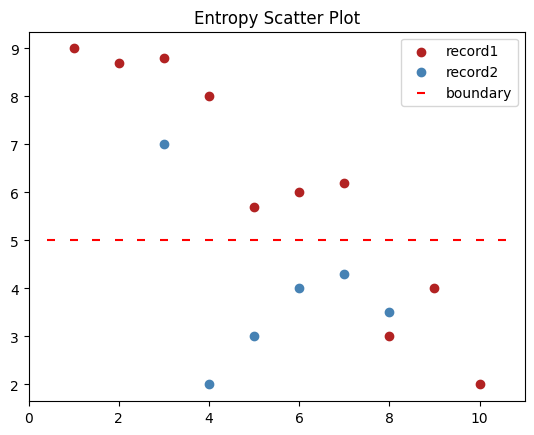

In [19]:
import matplotlib.pyplot as plt
x = [x for x in range(1,11)]
y = [9,8.7,8.8,8,5.7,6,6.2,3,4,2] 
x1=[x1 for x1 in range(3,9)]
y1=[7,2,3,4,4.3,3.5]
x2=[x2/2 for x2 in range(1,22)]
y2=[5 for y in range(1,22)]

plt.scatter(x,y, label='record1',color='firebrick')
plt.scatter(x1,y1,label='record2',color='steelblue')
plt.scatter(x2,y2,label='boundary',marker='_',color='red')


plt.title('Entropy Scatter Plot')
plt.legend()
plt.show()

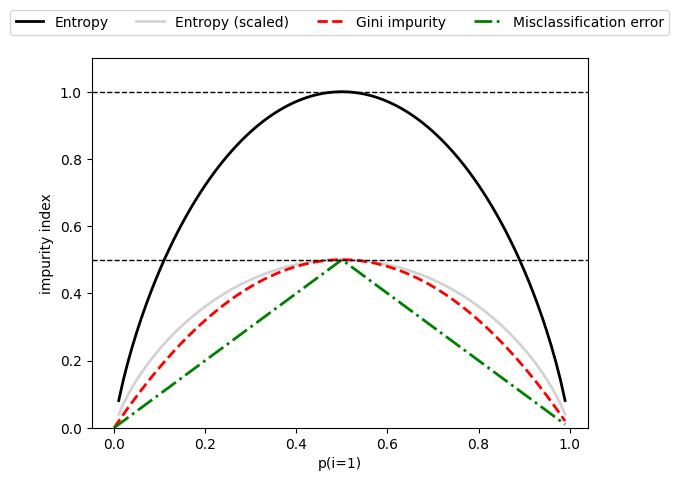

In [20]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

불순도/불확실성
그렇다면 대체 어떤 기준으로 영역을 나누는 걸까요? 타겟변수(Y)가 범주형 변수인 분류나무를 기준으로 설명하겠습니다.<br>
결론부터 말씀드리면 분류나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행합니다.<br>
순도가 증가/불확실성이 감소하는 걸 두고 정보이론에서는 정보획득(information gain)이라고 합니다.<br>
순도(어떤 데이터가 균일한 정도를 나타내는 지표) 를 계산하는 방법에는 3가지 방식이 존재합니다.<br> 
이를 알기 위해선 우선 엔트로피와 정보이득 그리고 지니계수에 대해 알아볼 필요가 있습니다. <br>

엔트로피(entropy)란, '주어진 집합의 혼잡도'를 의미하며 서로 다른 값이 섞여있으면 높고(1에 가까움) 같은 값만이 존재할 수록 낮습니다(0에 가까움).<br>
그림을 통해 보겠습니다.<br>
![title](../photo/entropy1.png)<br>
m개의 데이터가 속해있는 주황색 박스를 A영역이라고 하겠습니다.<br> A영역에 대한 엔트로피는 아래와 같은 식으로 정의됩니다.<br>
(Pk=A영역에 속하는 레코드 가운데 k 범주에 속하는 레코드의 비율)<br>
$Entropy(A)=-\sum _{ k=1 }^{ m }{ { p }_{ k }\log _{ 2 }{ { (p }_{ k }) }  }$<br>
위 이미지에서 전체 레코드 16개(m=16) 가운데 빨간색 동그라미는 10개, 파란색은 6개가 있습니다.<br> 그럼 A 영역의 엔트로피는 다음과 같이 쓸 수 있습니다.<br>
$Entropy(A)=-\frac { 10 }{ 16 } \log _{ 2 }{ (\frac { 10 }{ 16 } ) } -\frac { 6 }{ 16 } \log _{ 2 }{ (\frac { 6 }{ 16 } ) } \approx 0.95$<br>


여기서 A 영역에 빨간색 점선을 그어 두 개 부분집합(region1, region2)으로 분할한다고 가정해 봅시다.<br>
두 개 이상 영역에 대한 엔트로피 공식은 아래 식과 같습니다.<br>
이 공식에 의해 분할 수 A 영역의 엔트로피를 아래와 같이 각각 구할 수 있습니다. (Ri=분할 레코드 가운데 분할 후 i 영역에 속하는 레코드의 비율)<br>

$Entropy(A)=\sum _{ i=1 }^{ d }{ { R }_{ i } } \left( -\sum _{ k=1 }^{ m }{ { p }_{ k }\log _{ 2 }{ { (p }_{ k }) }  }  \right)$<br>

$Entropy(A)=0.5\times \left( -\frac { 7 }{ 8 } \log _{ 2 }{ (\frac { 7 }{ 8 } ) } -\frac { 1 }{ 8 } \log _{ 2 }{ (\frac { 1 }{ 8 } ) }  \right) +0.5\times \left( -\frac { 3 }{ 8 } \log _{ 2 }{ (\frac { 3 }{ 8 } ) } -\frac { 5 }{ 8 } \log _{ 2 }{ (\frac { 5 }{ 8 } ) }  \right) \approx 0.75$ <br>

그럼 분기 전과 분기 후의 엔트로피가 어떻게 변화했는지 보겠습니다. 분기 전 엔트로피가 0.95였는데 분할한 뒤에 0.75가 된걸 수식으로 알 수 있습니다. <br>
0.2만큼 엔트로피 감소(=불확실성 감소=순도 증가=정보획득)한 걸로 봐서 의사결정나무 모델은 분할한 것이 분할 전보다 낫다는 판단 하에 데이터를 두 개의 부분집합으로 나누게 됩니다.<br>


만약 A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0입니다.<br> 반대로 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1의 값을 갖습니다. 다음으로 정보이득에 대해 알아보겠습니다.<br>
![title](../photo/Information_Gain.png)<br>

정보 이득은 엔트로피의 감소입니다. <br>
주어진 데이터셋을 기반으로 데이터 세트의 분할 전 엔트로피와 분할 후 평균 엔트로피 간의 차이를 계산합니다.<br>
ID3 결정 트리 알고리즘은 정보 이득을 사용하며 이에 대한 수식은 다음과 같습니다.<br>
$Information Gain = Entropy(before) - \sum _{ k=1 }^{ n }{Entropy(k,after)  }$

지니계수에 대해 알아보겠습니다.

지니계수

지니계수는 데이터 세트의 분할을 평가하는 데 사용되는 비용 함수로 이해할 수 있습니다. <br>
1에서 각 클래스(구분해야하는 데이터)의 확률 제곱의 합을 빼서 계산합니다. CART 에서는 지니를 사용합니다.<br>
$G.I(A)=\sum _{ i=1 }^{ d }{ { \left( { R }_{ i }\left( 1-\sum _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 } }  \right)  \right)  } }$

이제 코드를 써보면서 더욱 자세하게 알아보도록 하겠습니다.

In [57]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from MyPackage.CHAE_ML import train_test_split

df = pd.read_csv('iris.data')
df.reset_index(drop=True, inplace=True)
#df.info()
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1)
df.head()

Number of training examples m =  150
Number of features n =  4


,sepal.lenth,sepal.width,petal.lenth,petal.width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


우선 데이터셋을 이진화 하는 과정을 갖겠습니다.<br>
이진화가 필요한 이유는 의사결정나무는 한번 분기 때마다 변수 영역을 두 개로 구분하는 모델이기 때문입니다.<br>
그 이상의 변수를 구분 할 경우 분할시 가능성이 너무 많아 overfit될 가능성이 높아집니다.<br>

In [58]:
#df = pd.DataFrame([1,2,3,4,2,1,3], columns=['d'])
#print(df['d'].unique())
import itertools # 변수의 모든 클래시 조합을 얻기 위해 itertools 불러오기
def get_binary_split(df, attribute):
    
    '''
        이 부분을 채워주세요
                           '''
    
    a = list(df[attribute].unique())
    #타겟변수에 대한 값들이 어떤게 있는지 리스트로 만들기 위해 unique를 사용했습니다
    unique =[]
    for i in range(len(a)):
        unique.append([a[i]])
        #각각의 리스트 속 값들을 []또 리스트 안에 넣기 위한 코드입니다

    binary = list(itertools.combinations(a,2))
    #itertools의 combinations을 사용해서 이진분류로 만들었고
        
    for i in range(len(binary)):
        binary[i] = list(map(str,binary[i]))
    #각각의 값들을 또 list로 만들었습니다
    
    result = unique+list(binary)
    #두개를 합쳐서 이진 분류로 완성
    
    return result 

In [59]:
a = get_binary_split(df,'type')
print(a)

[[0], [1], [2], ['0', '1'], ['0', '2'], ['1', '2']]


머신러닝에서 자주 쓰이는 데이터 세트인 iris 입니다.
데이터는 "sepal.length","sepal.width","petal.length","petal.width","type"
꽃받침과 꽃잎의 길이와 폭으로 이루어져 있습니다.  
먼저 엔트로피를 얻어봅시다.

$Entropy(A)=-\sum _{ k=1 }^{ m }{ { p }_{ k }\log _{ 2 }{ { (p }_{ k }) }  }$<br>


In [61]:
# def get_Entropy(df, label) :
#     ''' 
#    Using the reduce function, The count for each feature is sequentially added to the entropy expression
#    to initially value 0
#     '''
#     D_len = df[label].count() # data_lenth
#     #print(df[label])
#     feature_val = (value for key, value in df[label].value_counts().items())#get dictionary
#     #print(feature_val)
#     return reduce(lambda x, y: x+(-(y/D_len) * np.log2(y/D_len)), \
#                   feature_val, 0)#as function take key and value, input value in y

In [63]:
def get_Entropy(df, feature) :
    #print('len of data:',len(df[feature]))
    #print(df[feature])
    #print('unique index list: ',list(df[feature].unique()))
    unique = list(df[feature].unique()) # df[feature]에 존재하는 값들을 받아내기 위해
    #print(type(unique))
    p = len(df[df[feature]==0])
    #print(p)

    entropy = 0
    for i in range(len(unique)):
        #p = len(df[df[feature].str.contains(unique[i])])/len(df[feature]) # if feature is str use this code
        p = len(df[df[feature]==i])/len(df[feature])
        entropy = entropy - p*math.log(p,2)
    return(entropy)


In [64]:
get_Entropy(df, "type")


len of data: 150
unique index list:  [0, 1, 2]
<class 'list'>
50


1.584962500721156

보면 이상한점이 있습니다. 엔트로피 값이 1을 초과해버렸죠. 이는 엔트로피가 이진화 된 데이터세트에서 작동해야 하기 때문입니다.<br>
이후에 이진화를 통해 차이점을 알아보겠습니다.

지니계수 공식을 적용시킨 함수를 만들어 보겠습니다.<br>
$Gini = 1 – \sum^n_{i=1}(P_i)^2$

In [26]:
# def get_gini(df, label):
#     D_len = df[label].count() # data lenth
#     # Cerate generator including each class count
#     count_arr = (value for key, value in df[label].value_counts().items()) #items()함수를 사용하면 딕셔너리에 있는 키와 값들의 쌍을 얻을 수 있다.
#     # reduce를 이용해 초기값 1에서 각 클래스 (count / D_len)^2 빼기
#     return reduce(lambda x, y: x - (y/D_len)**2 ,count_arr,1)


   

In [98]:
def get_Gini(df, feature) :
 
    unique = list(df[feature].unique()) # df[feature]에 존재하는 값들을 받아내기 위해
    print(len(unique))
    print(len(df[df[feature] == 1]))
    gini = 0
    for i in range(len(unique)):
        ratio = len(df[df[feature]==i])/len(df[feature])
        gini += ratio**2
    return 1 - gini

In [99]:
print(df['type'].value_counts())


0    50
1    50
2    50
Name: type, dtype: int64


In [100]:
get_Gini(df,'type')


3
50


0.6666666666666667

붓꽃 데이터 셋의 불순도를 낮추려면 Information gain이 필요하다는것을 설명했습니다.<br> 정보이득은 엔트로피와 함께 사용되고, 회귀와 분류 두가지 경우에 모두 사용이 가능합니다.<br> 회귀와 분류를 기준으로 정보이득은 다음과 같은 수식으로 표현할 수 있습니다.<br>

$Information Gain_{Classification}= E(d) – \sum \frac{|s|}{|d|}E(s)$<br>

$Information Gain_{Regresion}= Variance(d) – \sum \frac{|s|}{|d|}Variance(s)$<br>

이 데이터 셋을 이용해서 함수로 만들어보겠습니다.

In [29]:


def information_gain(df, attribute, label):
    result = {}
    keys = get_binary_split(df, attribute)
    D_len = df[attribute].shape[0]
    for key in keys:
        t_index = df[attribute].map(lambda x: x in key) # Split한 클래스들에 속하는 df Index 추출
        Dj_len = sum(t_index) # Sum으로 True갯수 계산
        #print(Dj_len)
        # Gini 식 계산,  ~index를 통해 False_index로 전환
        gini = (Dj_len / D_len) * (get_Gini(df[t_index], label)) + ((D_len - Dj_len) / D_len) * (get_Gini(df[~t_index], label))
        #print(gini)
        result[tuple(key) ] = gini
    #print(df[~t_index])
    return result

In [30]:
information_gain(df, "petal.lenth", "type")


{(1.4,): 0.6086956521739132,
 (1.3,): 0.6340326340326341,
 (1.5,): 0.5980392156862745,
 (1.7,): 0.6484018264840183,
 (1.6,): 0.6340326340326341,
 (1.1,): 0.6621923937360178,
 (1.2,): 0.6576576576576577,
 (1.0,): 0.6621923937360178,
 (1.9,): 0.6576576576576577,
 (4.7,): 0.6436781609195401,
 (4.5,): 0.6414319248826291,
 (4.9,): 0.6602298850574712,
 (4.0,): 0.6436781609195401,
 (4.6,): 0.653061224489796,
 (3.3,): 0.6576576576576577,
 (3.9,): 0.653061224489796,
 (3.5,): 0.6576576576576577,
 (4.2,): 0.6484018264840183,
 (3.6,): 0.6621923937360178,
 (4.4,): 0.6484018264840183,
 (4.1,): 0.653061224489796,
 (4.8,): 0.6621004566210046,
 (4.3,): 0.6576576576576577,
 (5.0,): 0.6586757990867581,
 (3.8,): 0.6621923937360178,
 (3.7,): 0.6621923937360178,
 (5.1,): 0.6414319248826291,
 (3.0,): 0.6621923937360178,
 (6.0,): 0.6576576576576577,
 (5.9,): 0.6576576576576577,
 (5.6,): 0.6388888888888888,
 (5.8,): 0.653061224489796,
 (6.6,): 0.6621923937360178,
 (6.3,): 0.6621923937360178,
 (6.1,): 0.6530612

In [31]:
my_dict = information_gain(df, "petal.width", "type")
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
print('Min -',key_min, ":", my_dict[key_min])

Min - (0.2,) : 0.5136612021857924


In [32]:
my_dict = information_gain(df, "petal.lenth", "type")
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
print('Min -',key_min, ":", my_dict[key_min])

Min - (1.5,) : 0.5980392156862745


In [33]:
my_dict = information_gain(df, "sepal.width", "type")
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
print('Min -',key_min, ":", my_dict[key_min])

Min - (3.5,) : 0.6388888888888888


In [34]:
my_dict = information_gain(df, "sepal.lenth", "type")
key_min = min(my_dict.keys(), key=(lambda k: my_dict[k]))
print('Min -',key_min, ":", my_dict[key_min])

Min - (5.1,) : 0.6367218282111899


In [35]:
target = "type"

def get_important_feature(df, target):
    cols = df.columns[df.columns != target]
    results = []
    for col_name in cols:
        my_dict = information_gain(df, col_name, target)
        if my_dict:
            min_key = min(my_dict.keys(), key=(lambda k: my_dict[k]))
            print(f"{col_name}) Gini Index: {my_dict[min_key]} {min_key}")
            results.append((my_dict[min_key], col_name, min_key))
    results.sort()
    return results[0]

# print('최적의 값:', get_important_feature(df, "type"))


sepal.lenth) Gini Index: 0.6367218282111899 (5.1,)
sepal.width) Gini Index: 0.6388888888888888 (3.5,)
petal.lenth) Gini Index: 0.5980392156862745 (1.5,)
petal.width) Gini Index: 0.5136612021857924 (0.2,)
최적의 값: (0.5136612021857924, 'petal.width', (0.2,))


이제 트리를 구현해야하는데 너무 복잡해서 클래스로 만들지 않으면 구현하기 어려워 다시 만들겠습니다.